In [2]:
import pandas as pd
import geopandas
import numpy as np

%matplotlib inline

# load data
crosswalks = pd.read_csv("crosswalks_and_neighborhoods.csv", 
                                       index_col="_id") # use the column named _id as the row index
population = pd.read_csv("Pittsburgh_2015_census_data.csv", index_col="_id")

In [3]:
crosswalks.head(10)
#test

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,
1,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
2,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
3,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
4,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
5,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267
6,768755224,Crosswalk - Two Lined,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443852,-79.939028
7,1308677189,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443965,-79.938673
8,1159710354,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.445632,-79.931342
9,216672403,Crosswalk - Continental,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-9,40.444583,-79.945557


In [4]:
population.head(10)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
_id,,,,
1,Allegheny Center,1,1411.0,196.000000
2,Allegheny West,2,343.0,96.000000
3,Allentown,3,2558.0,449.773276
4,Arlington,4,1852.0,348.188168
5,Arlington Heights,5,272.0,126.000000
6,Banksville,6,3858.0,581.107563
7,Bedford Dwellings,7,1349.0,180.000000
8,Beechview,8,8078.0,719.658252
9,Beltzhoover,9,1702.0,343.072879


In [7]:
#query_mask = crosswalks_pandas["type"] == 

#crosswalks_pandas.pivot(columns="neighborhood", values="type").head()
#crosswalks_pandas.plot()

# finds the total number of crosswalks for each neighborhood
cross_dict = {}
cross_types_dict = {}
bricks_dict = {}

for index, row in crosswalks.iterrows():
    neigh_name = row["neighborhood"]
    cross_name = row["type"]
    
    # if the neighborhood is not in the dictionary, set it equal to 1
    if (neigh_name not in cross_dict):
        cross_dict[neigh_name] = 1
        # if the crosswalk found is brick, adds it to the bricks dictionary (key=neighborhood, value=quantity)
        if ("Brick" in cross_name):
            bricks_dict[neigh_name] = 1
    # else, if the item already exists in the dictionary add 1
    elif (neigh_name in cross_dict):
        cross_dict[neigh_name] += 1
        # if the crosswalk found is brick, adds 1 to the bricks dictionary (key=neighborhood, value=quantity)
        if ("Brick" in cross_name):
            if (neigh_name not in bricks_dict):
                bricks_dict[neigh_name] = 1
            elif (neigh_name in bricks_dict):
                bricks_dict[neigh_name] += 1

# finds how many times each type of crosswalk appears
for index, row in crosswalks.iterrows():
    cross_name = row["type"]
    
    # if the neighborhood is not in the dictionary, set it equal to 1
    if (cross_name not in cross_types_dict):
        cross_types_dict[cross_name] = 1
    # else, if the item already exists in the dictionary add 1
    elif (cross_name in cross_types_dict):
        cross_types_dict[cross_name] += 1
        
print("Total # of crosswalks for each neighborhood")      
print(cross_dict)
print("\n Total # of each type of crosswalk")
print(cross_types_dict)
print("\n Total # of brick crosswalks for each neighborhood (0 is omitted)")
print(bricks_dict)

Total # of crosswalks for each neighborhood
{'Central Business District': 402, 'Strip District': 114, 'Morningside': 33, 'Squirrel Hill North': 112, 'Squirrel Hill South': 239, 'Shadyside': 190, 'Polish Hill': 29, 'North Oakland': 125, 'West Oakland': 41, 'Central Oakland': 113, 'East Liberty': 146, 'Bloomfield': 192, 'South Oakland': 66, 'Stanton Heights': 22, 'Terrace Village': 67, 'Highland Park': 64, 'Bluff': 82, 'Lincoln-Lemington-Belmar': 29, 'Lincoln Place': 15, 'Lower Lawrenceville': 40, 'Crawford-Roberts': 63, 'Middle Hill': 59, 'Bedford Dwellings': 8, 'Upper Hill': 21, 'Point Breeze': 91, 'Larimer': 58, 'Point Breeze North': 53, 'Homewood West': 20, 'Homewood North': 40, 'Homewood South': 81, 'East Hills': 21, nan: 14, 'Friendship': 37, 'Regent Square': 15, 'South Side Flats': 262, 'South Shore': 15, 'Swisshelm Park': 7, 'Greenfield': 68, 'Hazelwood': 68, 'Glen Hazel': 7, 'Elliott': 25, 'Hays': 7, 'Esplen': 15, 'New Homestead': 1, 'Central Lawrenceville': 81, 'West End': 24, 

In [9]:
# finds the number of people per crosswalk in each neighborhood
census_dict = {}
ppl_per_crosswalk = {}

for index, row in population.iterrows():
    neigh_name = row["Neighborhood"]
    estimate = row["Estimate; Total"]
    
    census_dict[neigh_name] = estimate
    if (neigh_name in cross_dict):
        ppl_per_crosswalk[neigh_name] = estimate / cross_dict[neigh_name]

print("Total population estimates for each neighborhood")
print(census_dict)
print("\n Number of people per crosswalk for each neighborhood")
print(ppl_per_crosswalk)

Total population estimates for each neighborhood
{'Allegheny Center': 1411.0, 'Allegheny West': 343.0, 'Allentown': 2558.0, 'Arlington': 1852.0, 'Arlington Heights': 272.0, 'Banksville': 3858.0, 'Bedford Dwellings': 1349.0, 'Beechview': 8078.0, 'Beltzhoover': 1702.0, 'Bloomfield': 8669.0, 'Bluff': 6294.0, 'Bon Air': 920.0, 'Brighton Heights': 7421.0, 'Brookline': 13160.0, 'California-Kirkbride': 803.0, 'Carrick': 10122.0, 'Central Business District': 4060.0, 'Central Lawrenceville': 4775.0, 'Central Northside': 2892.0, 'Central Oakland': 5822.0, 'Chartiers City': 560.0, 'Chateau': 3.0, 'Crafton Heights': 3964.0, 'Crawford-Roberts': 2225.0, 'Duquesne Heights': 2522.0, 'East Allegheny': 2095.0, 'East Carnegie': 610.0, 'East Hills': 2859.0, 'East Liberty': 5537.0, 'Elliott': 2491.0, 'Esplen': 309.0, 'Fairywood': 1181.0, 'Fineview': 1270.0, 'Friendship': 1840.0, 'Garfield': 3966.0, 'Glen Hazel': 716.0, 'Greenfield': 7690.0, 'Hays': 405.0, 'Hazelwood': 4257.0, 'Highland Park': 6810.0, 'Home

In [11]:
# proportion of each neighborhoods brick to total crosswalks
prop_dict = {}
prop_dict["Central Business District"] = bricks_dict["Central Business District"] / cross_dict["Central Business District"]
prop_dict["North Shore"] = bricks_dict["North Shore"] / cross_dict["North Shore"]
prop_dict["Chateau"] = bricks_dict["Chateau"] / cross_dict["Chateau"]
prop_dict["South Side Flats"] = bricks_dict["South Side Flats"] / cross_dict["South Side Flats"]

print(prop_dict)

{'Central Business District': 0.3781094527363184, 'North Shore': 0.41333333333333333, 'Chateau': 0.10344827586206896, 'South Side Flats': 0.030534351145038167}


In [12]:
#creates a dataframe for each neighborhood with # people per crosswalk
num_per_cross = pd.Series(ppl_per_crosswalk)
num_per_cross

Allegheny Center        34.414634
Allegheny West          13.192308
Allentown              106.583333
Arlington              142.461538
Banksville             241.125000
                          ...    
Upper Lawrenceville     81.000000
West End                 9.791667
West Oakland            41.878049
Westwood               321.545455
Windgap                139.454545
Length: 88, dtype: float64

In [13]:
# Turning the Series into a DataFrame with column names
cr_df = pd.DataFrame(num_per_cross).reset_index()
cr_df.columns = ['Neighborhood', '# People per Crosswalk']
cr_df

,Neighborhood,# People per Crosswalk
0,Allegheny Center,34.414634
1,Allegheny West,13.192308
2,Allentown,106.583333
3,Arlington,142.461538
4,Banksville,241.125000
...,...,...
83,Upper Lawrenceville,81.000000
84,West End,9.791667
85,West Oakland,41.878049
86,Westwood,321.545455


In [14]:
# Turning the DataFrame back into a series to plot it on the map
num_per_cross = cr_df.groupby("Neighborhood").sum()['# People per Crosswalk']
num_per_cross.sort_values(ascending=False)

Neighborhood
New Homestead           973.000000
Chartiers City          560.000000
Mount Oliver Borough    424.875000
Fineview                423.333333
Summer Hill             397.000000
                           ...    
West End                  9.791667
Strip District            6.552632
North Shore               2.733333
South Shore               0.800000
Chateau                   0.103448
Name: # People per Crosswalk, Length: 88, dtype: float64

* If there are less people per crosswalk, that likely means that the people there have more access to crosswalks
* For the neighborhoods with numbers less than 1, that means that there are more crosswalks than there are people
* If the proportion of people to crosswalks is smaller, it's likely that the area is also more walkable and that more attention is paid to pedestrian safety

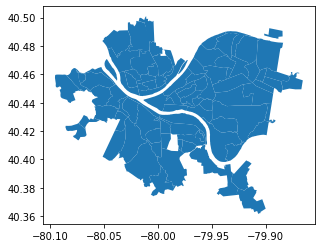

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [17]:
# do the merge
crosswalks_map = neighborhoods.merge(num_per_cross, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
crosswalks_map[['hood','# People per Crosswalk','geometry']].head()

,hood,# People per Crosswalk,geometry
0,Central Oakland,51.522124,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,76.816000,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,41.878049,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,35.317460,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,6.552632,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


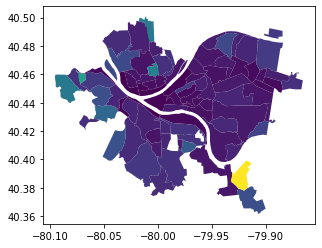

In [19]:
# draw a choropleth map using data from the column named "number_of_steps"
crosswalks_map.plot(column='# People per Crosswalk')

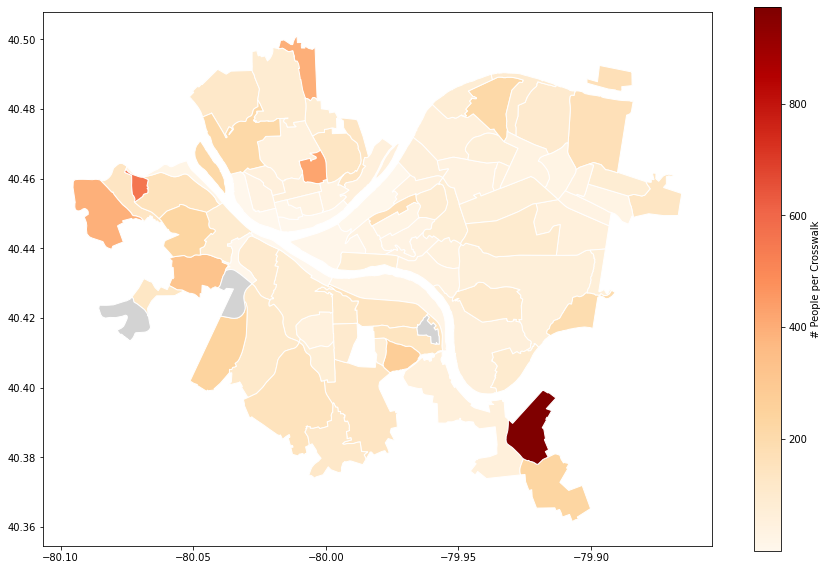

In [22]:
# all neighborhoods plotted
crosswalks_map.plot(column='# People per Crosswalk', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "# People per Crosswalk"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [23]:
# neighborhoods plotted without New Homestead


**Conclusion**


* One aspect that hasn't been considered is how different types of streetlights and the presence of pedestrian traffic signals may affect how safe the neighborhood is for them
* Missing census data for Arlington Heights, Ridgemont, and East Carnegie
